# **Fares Ahmed Moustafa**
## *F.ahmed2270@nu.edu.eg*
---

### ***1) Dataset choice***

Chosen dataset: MNIST — handwritten digits.

Image size: 28 × 28

Channels: 1 (grayscale)

Classes: 10 (digits 0–9)

Total images: 60,000 train / 10,000 test

In [21]:
from tensorflow.keras.datasets import mnist

# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [22]:
import numpy as np
import pandas as pd

# Flatten images: (28,28) -> (784,)
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Combine both datasets
X = np.concatenate((x_train_flat, x_test_flat), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

# Create DataFrame
df = pd.DataFrame(X)
df['label'] = y

print(df.shape)   # (70000, 785)
df.head()

(70000, 785)


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


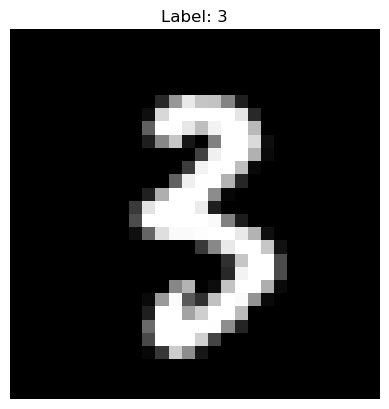

In [23]:
import matplotlib.pyplot as plt

# Separate features and label
X = df.drop('label', axis=1)
y = df['label']

# Pick one sample, e.g., first row
index = 45000
image = X.iloc[index].values.reshape(28, 28)  # reshape to 28x28
label = y.iloc[index]

# Show the image
plt.imshow(image, cmap='gray')
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()

### ***2) Preprocessing***

In [24]:
# Normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape to include channel dimension (since CNNs expect 4D input)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


### ***3) CNN Model Architecture***



In [25]:
from tensorflow.keras import layers, models


def build_mnist_cnn(input_shape=(28,28,1), num_classes=10):
    model = models.Sequential([
        layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=input_shape),
        layers.Conv2D(64, (3,3), padding='same', activation='relu'),
        layers.MaxPooling2D((2,2)),
        
        layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        layers.MaxPooling2D((2,2)),
        
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

model = build_mnist_cnn()
model.summary()

c:\Users\fares\anaconda3\envs\cnnEnv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 896,906 (3.42 MB)

 Trainable params: 896,906 (3.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',      # what to monitor
    patience=3,              # how many epochs to wait before stopping
    restore_best_weights=True  # revert to best weights instead of last ones
)

history = model.fit(
    x_train, y_train,
    epochs=30,              # reduce from 100 or so
    batch_size=32,          # smaller batch helps learning details
    validation_data=(x_test, y_test),
    callbacks=[early_stop]
)

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 37ms/step - accuracy: 0.9905 - loss: 0.0302 - val_accuracy: 0.9942 - val_loss: 0.0171
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 96s 51ms/step - accuracy: 0.9932 - loss: 0.0226 - val_accuracy: 0.9932 - val_loss: 0.0199
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 111s 34ms/step - accuracy: 0.9939 - loss: 0.0201 - val_accuracy: 0.9923 - val_loss: 0.0228
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 40ms/step - accuracy: 0.9945 - loss: 0.0176 - val_accuracy: 0.9950 - val_loss: 0.0224


### ***4) Training Curves***

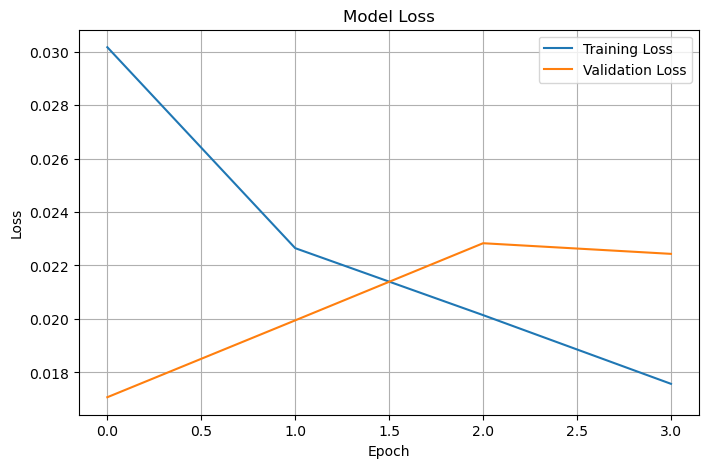

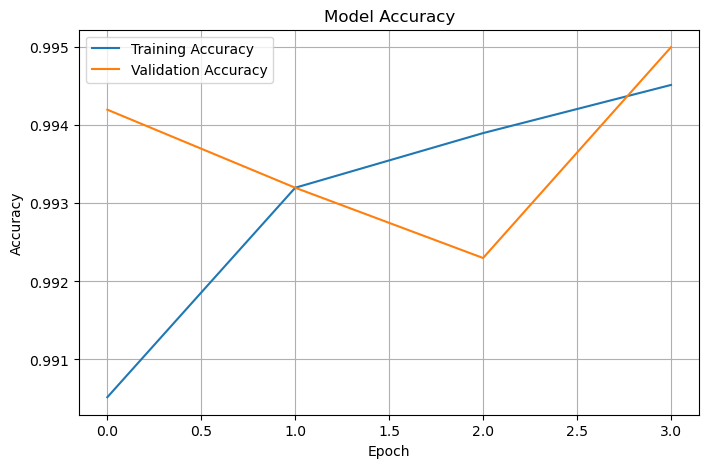

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

### ***5) Conclusion***

##### **MNIST is**:

Extremely clean — digits are centered, grayscale, and simple.

Low-dimensional — only 28×28 pixels.

Balanced — all classes (0–9) have roughly equal samples.

Large enough — 60,000 training + 10,000 test images.

##### **✅ Result**:
It’s one of the easiest benchmark datasets in machine learning.

So a CNN can easily achieve:

Training accuracy ≈ 99.5%

Validation/Test accuracy ≈ 99.4–99.7%

That’s completely normal and expected for MNIST.